In [1]:
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 11s (39.3 MB/s)
(Reading database ... 157604 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 157582 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-09-27 14:46:57--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   105MB/s    in 1.4s    

2022-09-27 14:46:58 (105 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import zipfile
local_zip = './horse-or-human.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [4]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse32-9.png', 'horse42-3.png', 'horse15-9.png', 'horse20-1.png', 'horse49-0.png', 'horse39-9.png', 'horse23-8.png', 'horse05-6.png', 'horse36-1.png', 'horse25-8.png']
['human14-12.png', 'human11-01.png', 'human16-14.png', 'human06-07.png', 'human04-06.png', 'human08-23.png', 'human11-30.png', 'human15-24.png', 'human03-03.png', 'human02-00.png']


In [6]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mimg

nrows = 4
ncols = 4

pic_index = 0

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                  for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

<Figure size 1152x1152 with 0 Axes>

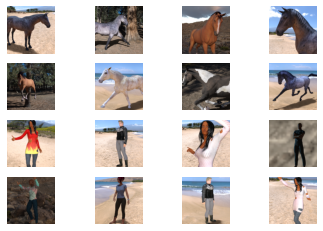

In [9]:
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mimg.imread(img_path)
  plt.imshow(img)

plt.show()
  

In [10]:
next_horse_pix+next_human_pix

['./horse-or-human/horses/horse32-9.png',
 './horse-or-human/horses/horse42-3.png',
 './horse-or-human/horses/horse15-9.png',
 './horse-or-human/horses/horse20-1.png',
 './horse-or-human/horses/horse49-0.png',
 './horse-or-human/horses/horse39-9.png',
 './horse-or-human/horses/horse23-8.png',
 './horse-or-human/horses/horse05-6.png',
 './horse-or-human/humans/human14-12.png',
 './horse-or-human/humans/human11-01.png',
 './horse-or-human/humans/human16-14.png',
 './horse-or-human/humans/human06-07.png',
 './horse-or-human/humans/human04-06.png',
 './horse-or-human/humans/human08-23.png',
 './horse-or-human/humans/human11-30.png',
 './horse-or-human/humans/human15-24.png']

In [11]:
import tensorflow as tf


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 13s 652ms/step - loss: 0.8565 - accuracy: 0.5150
Epoch 2/15
8/8 [==============================] - 6s 708ms/step - loss: 0.8709 - accuracy: 0.6618
Epoch 3/15
8/8 [==============================] - 6s 712ms/step - loss: 0.6450 - accuracy: 0.6485
Epoch 4/15
8/8 [==============================] - 6s 850ms/step - loss: 0.3401 - accuracy: 0.8954
Epoch 5/15
8/8 [==============================] - 6s 750ms/step - loss: 1.0449 - accuracy: 0.7219
Epoch 6/15
8/8 [==============================] - 6s 731ms/step - loss: 0.4035 - accuracy: 0.8543
Epoch 7/15
8/8 [==============================] - 6s 731ms/step - loss: 0.3064 - accuracy: 0.8966
Epoch 8/15
8/8 [==============================] - 6s 733ms/step - loss: 0.2526 - accuracy: 0.9066
Epoch 9/15
8/8 [==============================] - 7s 785ms/step - loss: 0.2871 - accuracy: 0.9155
Epoch 10/15
8/8 [==============================] - 6s 853ms/step - loss: 0.2614 - accuracy: 0.9210
Epoch 11/15
8/8 [=

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving Amir_Niloufar.jpeg to Amir_Niloufar.jpeg
[0.00062121]
Amir_Niloufar.jpeg is a horse


In [19]:
 print(classes)

[[0.00062121]]


In [20]:

path = '/content/horse-or-human/humans/human01-00.png'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
  print(path + " is a human")
else:
  print(path + " is a horse")

[0.99938]
/content/horse-or-human/humans/human01-00.png is a human


In [21]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [36]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs = successive_outputs)


In [58]:
successive_outputs

[<KerasTensor: shape=(None, 149, 149, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 147, 147, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 73, 73, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 71, 71, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 35, 35, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 33, 33, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 3136) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


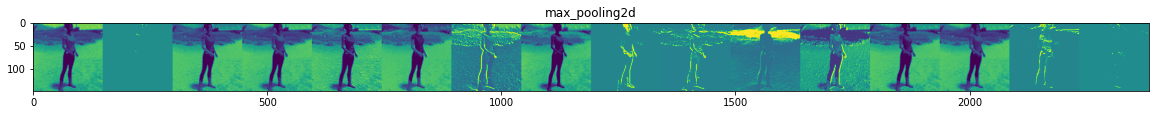

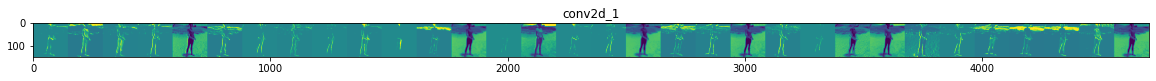

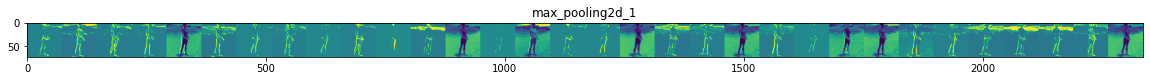

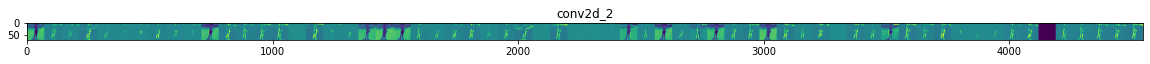

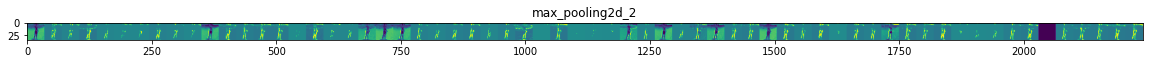

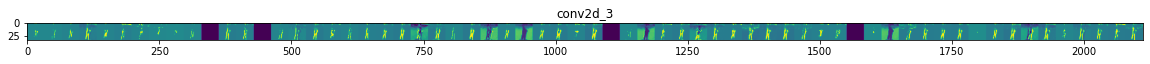

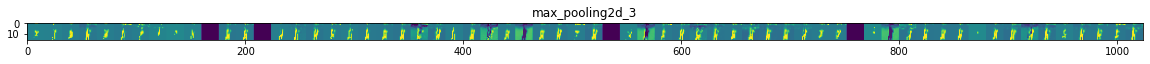

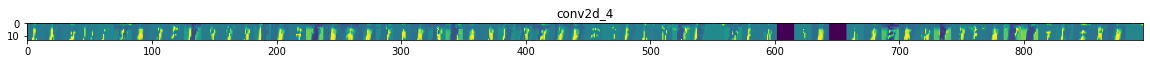

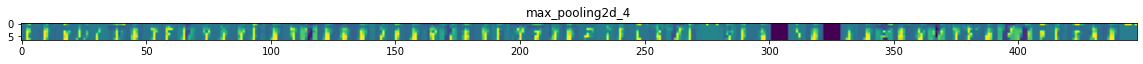

In [59]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)